## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [4]:
a= -2
b =1
x_i =np.linspace(0, 20)
y_i = a * x_i + b 
print("x length : \t" , len(x_i))
print("y length : \t" , len(y_i))
print("x points = \n" , x_i)
print("y_points = \n",y_i)

x length : 	 50
y length : 	 50
x points = 
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
y_points = 
 [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -1

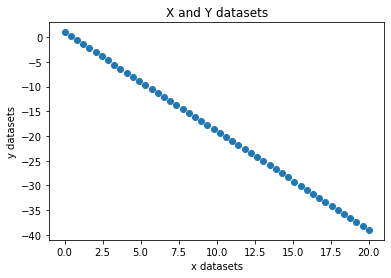

In [5]:
plt.scatter(x_i ,y_i)
plt.title("X and Y datasets")
plt.xlabel("x datasets")
plt.ylabel("y datasets")
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [6]:
def GD(x_i , y_i , alpha , max_iterations):
    m = len(x_i)
    theta_0 = 0
    theta_1 = 0
    loss = []
    all_theta0 = []
    all_theta1 = []
    allhypo =[]
    for i in range(max_iterations):
        hypo = theta_0 + theta_1 * x_i
        allhypo.append(hypo)
        error = hypo - y_i
        cost = (np.sum(error)**2) / (2*m)
        loss.append(cost)
        gd_theta0 = (1/m) * np.sum(error) 
        gd_theta1 = (1/m) * np.sum(error * x_i)
        theta_0 = theta_0 - alpha * gd_theta0
        all_theta0.append(theta_0)
        theta_1 = theta_1 - alpha * gd_theta1
        all_theta1.append(theta_1)
        if(gd_theta0**2 + gd_theta1**2 < 1e-3):
            print(f"it stopped at iteration number {i}")
            break
    return all_theta0 , all_theta1 , loss , hypo , allhypo , theta_0 , theta_1

#### Try your function with any input parameterss of your choice.

In [7]:
all_theta0 , all_theta1 , loss , hypo ,allhypo , th0 ,th1 =GD(x_i , y_i , 0.0112 , 10000)

it stopped at iteration number 776


#### Calculate r2 score

In [8]:
from sklearn.metrics import r2_score

In [9]:
r2_score(y , allhypo[-1])

NameError: name 'y' is not defined

In [10]:
result = sum((y_i - hypo)**2)
mean = np.mean(y_i)
total = sum((y_i - mean)**2)
r_score = 1 - (result / total)
print(r_score)

0.9999719644991953


#### Plot loss vs. epochs

In [11]:
len(loss)

777

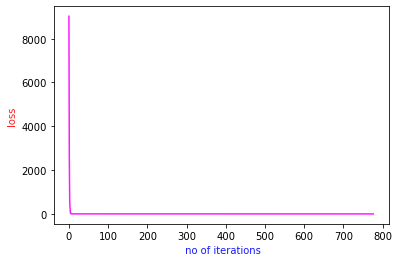

In [12]:
plt.plot(loss ,color = 'magenta' ,  alpha = 0.9)
plt.xlabel(" no of iterations" , color = 'b' , alpha = 0.9)
plt.ylabel("loss" , color = 'r' , alpha = 0.9)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

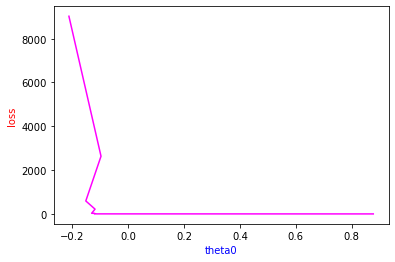

In [13]:
plt.plot(all_theta0 , loss , color = 'magenta')
plt.xlabel("theta0" , color = 'b')
plt.ylabel("loss" , color = 'r')
plt.show()

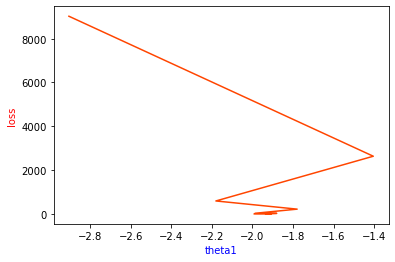

In [14]:
plt.plot(all_theta1 , loss , color = 'orangered')
plt.xlabel("theta1" , color = 'b')
plt.ylabel("loss" , color = 'r')
plt.show()

In [15]:
loss

[9025.0,
 2633.859704163266,
 591.4121362933946,
 218.24896100750783,
 29.59284259176188,
 25.020112728843277,
 0.16139283953354824,
 5.689216559535549,
 0.880560342471275,
 2.8224679084360984,
 1.6652712690545977,
 2.2070902277895583,
 1.900444137143236,
 2.0384650516112064,
 1.9493330716562571,
 1.977896833352253,
 1.9460347226923025,
 1.9454521555447974,
 1.9288547355334322,
 1.9206111195140187,
 1.9081587402655893,
 1.8979715209668333,
 1.8867119895074382,
 1.8760997618175965,
 1.865247962547858,
 1.8546131629212166,
 1.8439595007131846,
 1.8334080109369666,
 1.8228957800256682,
 1.8124547081565467,
 1.8020678296885098,
 1.7917433683759283,
 1.7814765678532416,
 1.7712693649272635,
 1.7611202495631,
 1.75102949122729,
 1.7409964451122106,
 1.7310209405438182,
 1.7211025653526122,
 1.711241034706134,
 1.7014360009892362,
 1.6916871517792182,
 1.6819941593309762,
 1.6723567065977734,
 1.6627744738029455,
 1.653247145345585,
 1.643774406225218,
 1.6343559438688078,
 1.6249914471733988

#### Plot all regression lines till converge

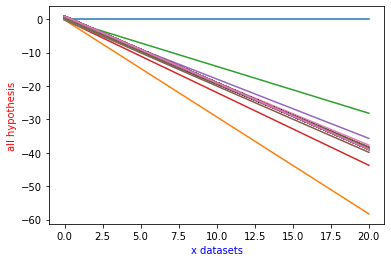

In [16]:
for i in range(len(allhypo)):
    plt.plot(x_i ,allhypo[i] )

plt.xlabel("x datasets" , color = 'blue')
plt.ylabel("all hypothesis" , color = 'red')
plt.show()

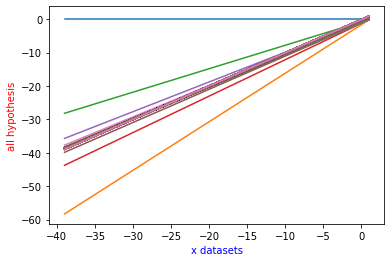

In [17]:
for i in range(len(allhypo)):
    plt.plot(y_i ,allhypo[i] )

plt.xlabel("x datasets" , color = 'blue')
plt.ylabel("all hypothesis" , color = 'red')
plt.show()

#### Plot the best regression line

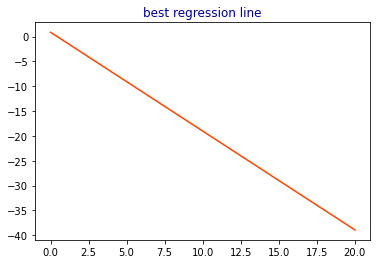

In [18]:
plt.plot(x_i , hypo , color = 'orangered')
plt.title("best regression line" , color = 'darkblue');

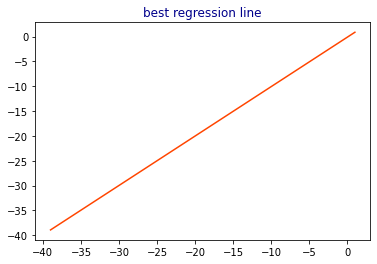

In [19]:
plt.plot(y_i , hypo , color = 'orangered')
plt.title("best regression line" , color = 'darkblue');

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [20]:
all_theta02 , all_theta12 , loss2 , hypo2 ,allhypo2 , th02 ,th12 =GD(x_i , y_i , 0.000001,20000)

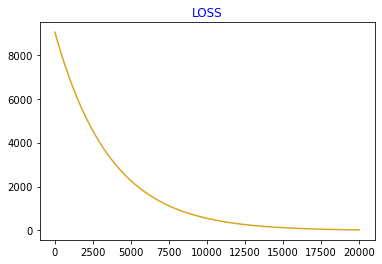

In [21]:
plt.plot(loss2 , color = 'goldenrod')
plt.title("LOSS" , color = 'blue');

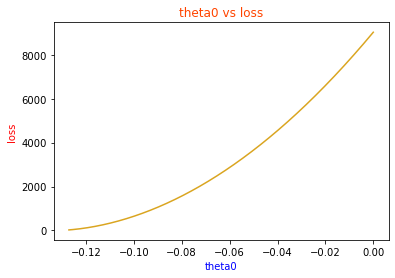

In [22]:
plt.plot(all_theta02 , loss2 , color = 'goldenrod')
plt.xlabel("theta0" , color = 'b')
plt.ylabel("loss" , color = 'r')
plt.title("theta0 vs loss" , color = 'orangered')
plt.show()

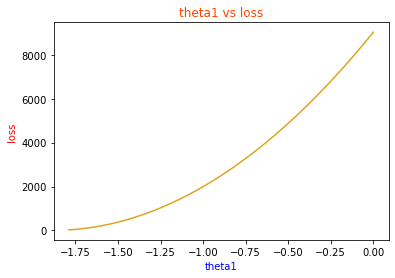

In [23]:
plt.plot(all_theta12 , loss2 , color = 'goldenrod')
plt.xlabel("theta1" , color = 'b')
plt.ylabel("loss" , color = 'r')
plt.title("theta1 vs loss" , color = 'orangered')
plt.show()

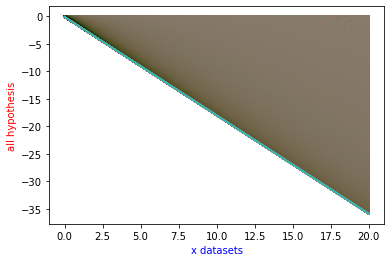

In [24]:
for i in range(len(allhypo2)):
    plt.plot(x_i ,allhypo2[i] )
plt.xlabel("x datasets" , color = 'blue')
plt.ylabel("all hypothesis" , color = 'red')
plt.show()


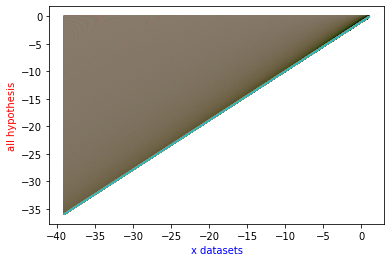

In [25]:
for i in range(len(allhypo2)):
    plt.plot(y_i ,allhypo2[i] )

plt.xlabel("x datasets" , color = 'blue')
plt.ylabel("all hypothesis" , color = 'red');

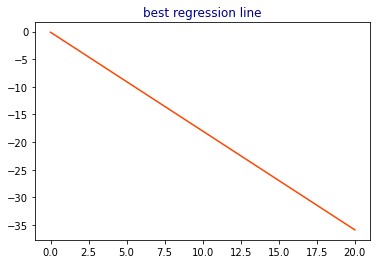

In [29]:
plt.plot(x_i , hypo2 , color = 'orangered')
plt.title("best regression line" , color = 'darkblue');

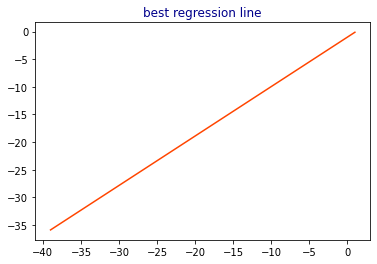

In [30]:
plt.plot(y_i , hypo2 , color = 'orangered')
plt.title("best regression line" , color = 'darkblue');

In [31]:
result = sum((y_i - hypo2)**2)
mean = np.mean(y_i)
total = sum((y_i - mean)**2)
r_score = 1 - (result / total)
print(r_score)

0.9816310948608162


In [33]:
r2_score(y_i , allhypo2[-1])

0.9816310948608162

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [59]:
def Mini_Batch(x_i , y_i , alpha , iterations , batch_size):
    theta0 = 0
    theta1 = 0
    loss = []
    all_theta0 =[]
    all_theta1 =[]
    x_batch = []
    y_batch = []
    allhypo = []
    allhypo1 = []
    itera = 0
    for i in range(iterations):
      
        for j in range(0 , len(x_i) , batch_size):
            if j == len(x_i):
                break
            for k in range(j , j + batch_size):
                
                x_batch.append(x_i[k])
                y_batch.append(y_i[k])
           
            x_batch1 = np.array(x_batch)
            y_batch1 = np.array(y_batch)
            
            hypo = theta0 + theta1 * x_batch1
            allhypo.append(hypo)
            
            all_theta0.append(theta0)
            all_theta1.append(theta1)
        
            cost = (sum(hypo - y_batch1)**2 )/ (2*(batch_size))
            loss.append(cost)
    
            theta0_gd = np.sum(hypo - y_batch1) / batch_size
            theta1_gd = np.sum((hypo - y_batch1)*x_batch1) / batch_size
    
            theta0 = theta0 - alpha * theta0_gd
            theta1 = theta1 - alpha * theta1_gd
            x_batch.clear()
            y_batch.clear()
        
        itera+=1
        if (cost < 0.01):
            break
       
            
        hypo1 = theta0 + theta1*x_i
        allhypo1.append(hypo1)
    optimum_theta0 = theta0
    optimum_theta1 = theta1
    hypo1 = optimum_theta0 + optimum_theta1* x_i
    
    return all_theta0,all_theta1, loss , allhypo, optimum_theta0, optimum_theta1, hypo1, itera,  allhypo1

In [66]:
 all_theta0,all_theta1, loss , allhypo, optimum_theta0, optimum_theta1, hypo, itera, allhypo1 = Mini_Batch(x_i, y_i, 0.0001, 10000, 10)

In [123]:
print(len(y_i))
print(len(hypo))
r2_score(hypo , y_i)

50
50
50000


0.999809519417012

In [69]:
result = sum((y_i - hypo)**2)
mean = np.mean(y_i)
total = sum((y_i - mean)**2)
r_score = 1 - (result / total)
print(r_score)

0.9998139418818281


## Plot Loss vs Epochs

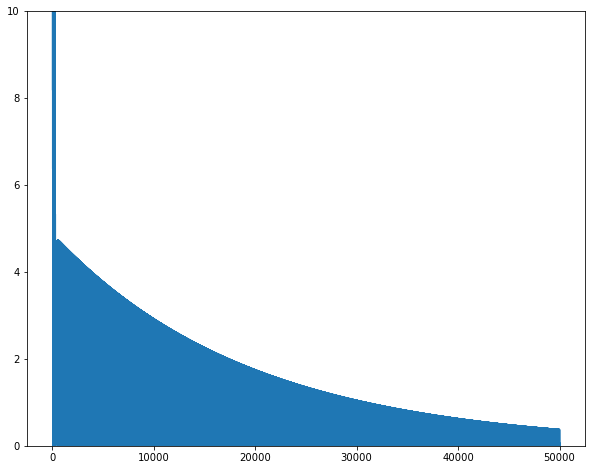

In [82]:
plt.figure(figsize =(10 , 8))
plt.ylim( 0 , 10)
plt.plot(loss)
plt.show()

## Plot theta0 vs Loss

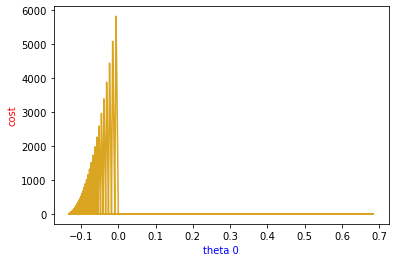

In [118]:
plt.plot(all_theta0, loss , color = 'goldenrod')
plt.xlabel('theta 0' , color = 'b')
plt.ylabel('cost' ,color = 'r')
plt.show()

## Plot theta1 vs Loss

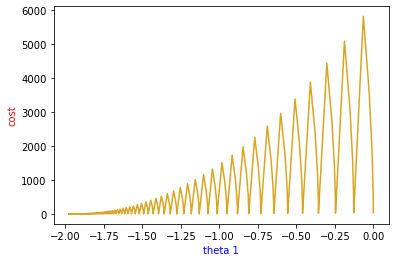

In [119]:
plt.plot(all_theta1 ,  loss , color = 'goldenrod')
plt.xlabel('theta 1' , color = 'b')
plt.ylabel('cost' ,color = 'r')
plt.show()

## Regerssion till converge

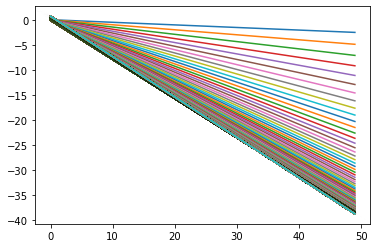

In [124]:
for i in range(len(allhypo1)):
    plt.plot(allhypo1[i])
plt.show()

In [125]:
## Best Regression Line

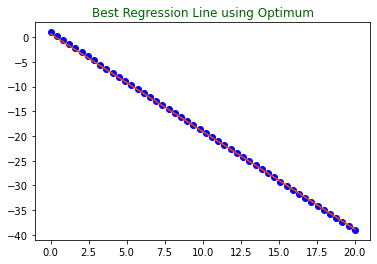

In [132]:
plt.scatter(x_i,y_i , color = 'blue')
plt.plot(x_i, hypo , color = 'orangered')
plt.title('Best Regression Line using Optimum' , color = 'darkgreen')
plt.show()

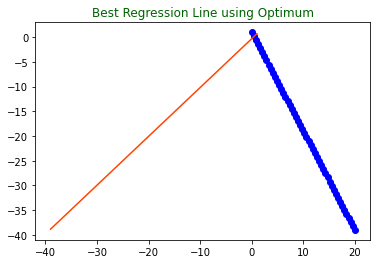

In [135]:
plt.scatter(x_i,y_i , color = 'blue')
plt.plot(y_i, hypo , color = 'orangered')
plt.title('Best Regression Line using Optimum' , color = 'darkgreen')
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [177]:
def Stochastic(x_i, y_i, alpha, max_iterations):
    
    # assumed value of the prameters
    
    theta0 = 0     
    theta1 = 0
    loss = []
    all_theta0 = []
    all_theta1 = []
    allhypo =[]

    hypo = theta0 + theta1* x_i
    cost =  (hypo - y_i)**2 
    for i in range(max_iterations) :
        for j in range(len(x_i)):
        
            hypo = theta0 + theta1* x_i[j]
            allhypo.append(hypo)
        
            all_theta0.append(theta0)
            all_theta1.append(theta1)
        
            cost =  (hypo - y_i[j])**2 
            loss.append(cost)

            theta0 = theta0 - alpha * 2*(hypo - y_i[j]) 
            theta1 = theta1 - alpha * 2*(hypo - y_i[j])*x_i[j] 
    
           
    optimum_theta0 = theta0
    optimum_theta1 = theta1
    hypo = theta0 + theta1* x_i
    
    
    return all_theta0 , all_theta1, loss , allhypo, optimum_theta0, optimum_theta1, hypo, allhypo


## calulate r2_score

In [248]:
all_theta0,all_theta1, loss , allhypo, optimum_theta0, optimum_theta1, hypo, allhypo = Stochastic(x_i, y_i, 0.00051, 100)

In [249]:
r2_score(hypo , y_i)

0.9996160354597233

## Plot Loss vs Epochs

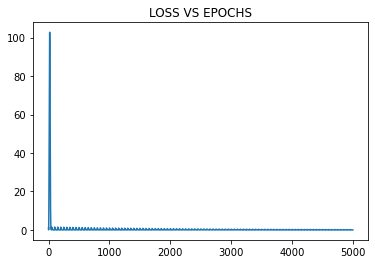

In [257]:
plt.plot(loss)
plt.title("LOSS VS EPOCHS");

## Plot Theta_0 vs Loss

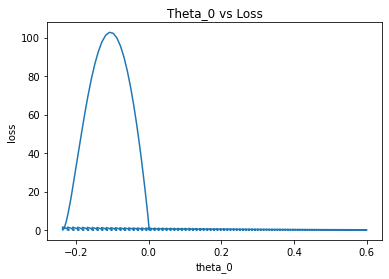

In [258]:
plt.plot(all_theta0 , loss)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('Theta_0 vs Loss');

## Plot Theta 1 vs Loss

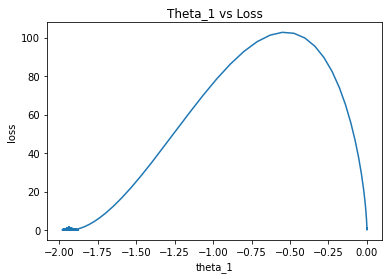

In [259]:
plt.plot(all_theta1 , loss)
plt.xlabel('theta_1')
plt.ylabel('loss')
plt.title('Theta_1 vs Loss');

## Plot All regression lines till converge

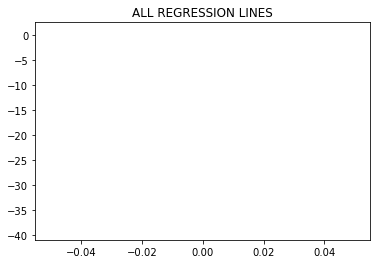

In [260]:
for j in range(0 , len(allhypo)):
    plt.plot( allhypo[j] )
plt.title("ALL REGRESSION LINES")
plt.show()

## Plot Best Regression Line

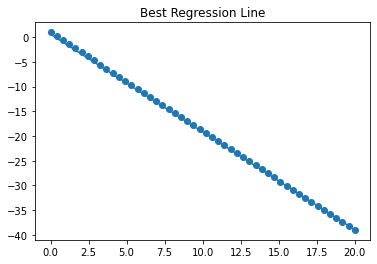

In [254]:
plt.scatter(x_i,y_i)
plt.plot(x_i, hypo)
plt.title('Best Regression Line')
plt.show()

In [255]:
print(len(allhypo))

5000
